In [4]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns
import random

In [5]:

class Veri():
    ################################################
    def genData(self, param, show=False):
        a = []
        if param[0] == "normal":
            mu, sigma, s = param[1], param[2], param[3]
            a = np.random.normal(mu, sigma, size=s)
        elif param[0] == 'uniform':
            mi, ma, s = param[1], param[2], param[3]
            a = np.random.uniform(mi, ma, s)
        elif param[0] == "poisson":
            rate, s = param[1], param[2]
            a = np.random.poisson(rate, s)
        if (show):
            count, bins, ignored = plt.hist(s, 14, density=True)
        return a

    def genInstantSymbol(self, verbose =False):
        x = self.symbols[ random.randint(0, 15)]
        if verbose: print(x)
        return x
    ################################################
    def genSample(self, signalCount, verbose=False):
        if verbose: print("generate sample data")
        signals = []
        for i in range(signalCount):
            a = self.genData(["normal", 100, 100, 8])
            # print(a)
            sig = []
            for j in range(8):
                sig.append(int(a[j]))
            signals.append(sig)
        for i in range(signalCount):
            if verbose: print(signals[i])
        return signals

    ################################################
    def mergeList(self, input_data, verbose=False):
        if verbose:
            print("merge data")
        merged_list = []
        for l in input_data:
            merged_list += list(l)
        return merged_list

    ################################################
    def listToPandasDF(self, input_data):
        df = pd.DataFrame(input_data)
        return df

    ################################################
    def getWaveletCoefs(self, input_data):
        coefs = []

        girdi = np.array(input_data)  # np.array([1,2,3,4,5,6,7,8])*1
        coeff = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
        coefs = (self.mergeList(coeff))
        return coefs

    ################################################
    def generateOperationsSymbols(self, operations_count, Test=False, verbose=False):
        ops_ids = []
        symbolSet = []

        for i in range(operations_count):
            if (verbose): print(i, end="\t")
            a = self.genData(["uniform", 0, 10, 4])
            a = [int(x) for x in a]
            if (Test):
                a[3] = 0
            go = True
            # a=[4, 5, 9, -5]

            rez = 0
            if (int(a[1]) % 4 == 0):  # operation is +
                if (a[0] + a[2] > 9):
                    go = False
                else:
                    rez = a[0] + a[2]
            elif (int(a[1]) % 4 == 1):  # operation is -
                if a[0] < a[2]:
                    go = False
                else:
                    # print("here", a[0] - a[2] , a[0] > a[2])
                    rez = a[0] - a[2]
            elif (int(a[1]) % 4 == 2):  # operation is *
                if (a[0] * a[2] > 9):
                    go = False
                else:
                    rez = a[0] * a[2]
            elif (int(a[1]) % 4 == 3):  # operation is -
                if (a[2] == 0):
                    go = False
                else:
                    rez = int(a[0] / a[2])
            # rint(go)
            if go:
                if verbose: print(go, rez)
                a[3] = rez
                ops_ids.append(a)
                symbolSet.append(self.symbols[a[0]])
                symbolSet.append(self.symbols[a[1] % 4 + 10])
                symbolSet.append(self.symbols[a[2]])
                symbolSet.append(self.symbols[14])
                if (not Test):
                    symbolSet.append(self.symbols[a[3]])
                else:
                    symbolSet.append(self.symbols[15])
        return ops_ids, symbolSet

    ################################################
    def quantize(self, input_data, len_of_data, verbose=False):
        borders = [-200, -100, -50, 0, 50, 100, 200]
        sig = []
        if (verbose):
            print(input_data)
        for j in range(int(len(input_data))):
            output = 7
            for k in range(7):
                if (input_data[j] < borders[k]):
                    output = k
                    break
            if verbose:
                print(output, end=" ")
            sig.append(output)
        if verbose:
            print()
        return sig

    ################################################
    def generateInputData(self, op_count, verbose=False):
        for i in range(10):
            encoded, symbol_based = self.generateOperationsSymbols(op_count, False, verbose)
            if len(symbol_based)>0:
                break
        if (verbose):
            print("operation symbols")
            [print(i, symbol_based[i]) for i in range(len(symbol_based))]
            print()
        return symbol_based

    ################################################
    def addNoise(self, data, noise_mean, noise_std):
        return data

    ################################################
    def rmse(self, predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())

    ################################################
    def displaySymbols(self):
        symbols_correspondence = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "+", "-", "*", "/", "=", "?"]
        print("indice", "symbol", "pattern")
        [print(i, "\t\t", symbols_correspondence[i], "\t\t", self.symbols[i]) for i in range(len(self.symbols))]

    ################################################
    def __init__(self):
        self.symbols = self.genSample(16)


In [31]:

class BaseStructure:
        ################################################
        def addBranch(self, input_data):
            poz = 0
            for j in range(len(input_data)): # for all data
                d = input_data[j]

                nei = list(self.agac.neighbors(poz)) # get neighbours of node with id poz
                if len(nei) == 0: # if there is no node, directly add node
                    self.agac.add_node(self.counter, value=d, occurance_count=1, id=-1)
                    self.agac.add_edge(poz, self.counter)
                    poz = self.counter
                    self.counter += 1
                else:
                    k = -1
                    for n in nei:
                        if (self.agac.node[n]['value'] == d):
                            k = n
                            break
                    if (k >= 0):
                        poz = k
                        self.agac.node[k]['occurance_count'] += 1
                    else:
                        self.agac.add_node(self.counter, value=d, occurance_count=1, id=-1)
                        self.agac.add_edge(poz, self.counter)
                        poz = self.counter
                        self.counter += 1
            return poz
        ################################################
        def checkBranch(self, input_data):
            poz = 0
            for j in range(len(input_data)): # for all data
                d = input_data[j]

                nei = list(self.agac.neighbors(poz)) # get neighbours of node with id poz
                if len(nei) == 0: # if there is no node, directly add node
                    return None
                else:
                    k = -1
                    for n in nei:
                        if (self.agac.node[n]['value'] == d):
                            k = n
                            break
                    if (k >= 0):
                        poz = k
                    else:
                        return None
            return poz
        ################################################
        def getBranchGivenStartNodeValue(self, startNodeValue):
            data = []
            nei = list(self.agac.neighbors(0))
            # print(nei)
            k = -1
            for n in nei:
                if (self.agac.node[n]['value'] == startNodeValue):
                    k = n
                    break
            # print(k)
            # data.append(k)

            while (k >= 0):
                nei = list(self.agac.neighbors(k))
                if len(nei) == 0:
                    k = -1
                else:
                    k = nei[0]
                    data.append( round(self.agac.node[k]['value'],2))
            return data
        ################################################
        def getBranchIDsGivenStartNodeValue(self, startNodeValue):
            data = []
            nei = list(self.agac.neighbors(0))
            # print(nei)
            k = -1
            for n in nei:
                if (self.agac.node[n]['value'] == startNodeValue):
                    k = n
                    break
            # print(k)
            # data.append(k)

            while (k >= 0):
                nei = list(self.agac.neighbors(k))
                if len(nei) == 0:
                    k = -1
                else:
                    k = nei[0]
                    # data.append(GG.node[k]['value'])
                    data.append(k)
            return data
        ################################################
        def plotGraph(self,title = "Tree structure", short=False):
            plt.rcParams['figure.figsize'] = [15, 10]
            labels = dict((n, round(d['value'], 2)) for n, d in self.agac.nodes(data=True))
            # pos=nx.graphviz_layout(GG, prog='dot')
            pos = graphviz_layout(self.agac, prog='dot')
            # nx.spring_layout(GG)

            plt.title(title +" node values")
            nx.draw_networkx(self.agac, pos=pos, arrows=True, with_labels=True, labels=labels)
            plt.show()
            if (short):
                return
            plt.title("node ids")
            nx.draw_networkx(self.agac, pos=pos, arrows=True, with_labels=True)
            plt.show()

            plt.title("node frequency")
            labels = dict((n, d['occurance_count']) for n, d in self.agac.nodes(data=True))
            nx.draw_networkx(self.agac, pos=pos, arrows=True, with_labels=True, labels=labels)
            plt.show()

            plt.title("final nodes ids")
            labels = dict((n, d['id']) for n, d in self.agac.nodes(data=True))
            nx.draw_networkx(self.agac, pos=pos, arrows=True, with_labels=True, labels=labels)
            plt.show()

            ################################################
        ################################################
        def learnSymbol(self, raw_data, verbose):
            cbid = self.addBranch(raw_data)

            # abid = self.getBranchId(qdata)
            if (verbose):
                print("Leaf id: ", cbid)
            return cbid
        ################################################
        def __init__(self):
            self.agac = nx.DiGraph()
            self.agac.add_node(0, value=999999, occurance_count=1, id=-1)
            self.counter = 1
            self.v = Veri()


In [32]:
class Abstract(BaseStructure):
    def __init__(self, windowLength, offset):
        self.windowLength =windowLength
        self.offset= offset
        BaseStructure.__init__(self)


    def learnSymbol(self, raw_data,verbose):
        qdata = self.preprocess(raw_data)

        if (verbose):
            print("preprocessed data: ", qdata)

        abid = self.addBranch(qdata)
        #abid = self.getBranchId(qdata)
        if (verbose):
            print("Abstract leaf id: ", abid)
        return abid

    ################################################
    def checkBranch(self, raw_data):
        input_data= self.preprocess(raw_data)
        poz = 0
        for j in range(len(input_data)):  # for all data
            d = input_data[j]

            nei = list(self.agac.neighbors(poz))  # get neighbours of node with id poz
            if len(nei) == 0:  # if there is no node, directly add node
                return None
            else:
                k = -1
                for n in nei:
                    if (self.agac.node[n]['value'] == d):
                        k = n
                        break
                if (k >= 0):
                    poz = k
                else:
                    return None
        return poz

    def preprocess(self, symbol_data):
        c = (self.v.getWaveletCoefs(symbol_data))
        # print(c)
        quantized_input = self.v.quantize(c, len_of_data=self.windowLength)
        return quantized_input



In [33]:
class Context1(BaseStructure):
    def __init__(self):
        BaseStructure.__init__(self)

In [52]:
class Context2(BaseStructure):
    def __init__(self):
        BaseStructure.__init__(self)

    def checkBranch(self, input_data):
        poz = 0
        for j in range(len(input_data)):  # for all data
            d = input_data[j]

            nei = list(self.agac.neighbors(poz))  # get neighbours of node with id poz
            if len(nei) == 0:  # if there is no node, directly add node
                return None
            else:
                k = -1
                for n in nei:
                    if (self.agac.node[n]['value'] == d):
                        k = n
                        break
                if (k >= 0):
                    poz = k
                else:
                    return None
        return self.agac.node[poz]['value']
    def checkShortBranch(self, input_data):
        poz = 0
        for j in range(len(input_data)):  # for all data
            d = input_data[j]

            nei = list(self.agac.neighbors(poz))  # get neighbours of node with id poz
            if len(nei) == 0:  # if there is no node, directly add node
                return None
            else:
                k = -1
                for n in nei:
                    if (self.agac.node[n]['value'] == d):
                        k = n
                        break
                if (k >= 0):
                    poz = k
                else:
                    return None
        nei = list(self.agac.neighbors(poz))
        poz = nei[0]

        return self.agac.node[poz]['value']


In [53]:
class Actuator(BaseStructure):
    def __init__(self, windowLength):
        self.windowLength = windowLength
        BaseStructure.__init__(self)
        self.learningRate = 0.1
        self.loopCount = 10

    def learnSymbol(self, raw_data,verbose):
        abid = self.checkBranch(raw_data)
        if not abid:
            sample_sound = self.v.mergeList([[raw_data], (self.v.genSample(1, verbose)[0])])
            abid = self.addBranch(sample_sound)
            if (verbose):
                print("Actuator leaf id: ", abid)
        return abid


    def checkBranch(self, input_data):
        poz = 0

        d = input_data

        nei = list(self.agac.neighbors(poz))  # get neighbours of node with id poz
        if len(nei) == 0:  # if there is no node, directly add node
            return None
        else:
            k = -1
            for n in nei:
                if (self.agac.node[n]['value'] == d):
                    k = n
                    break
            if (k >= 0):
                poz = k
            else:
                return None
        return poz

    def fineTune(self, branch_start_node, raw_data):
        nodes = self.getBranchIDsGivenStartNodeValue(branch_start_node)
        for j in range(self.loopCount):
            for i in range(len(nodes)):
                # print (i, branch[i] , GG.node[nodes[i]]['value'])
                self.agac.node[nodes[i]]['value'] += round(
                    (raw_data[i] - self.agac.node[nodes[i]]['value']) * self.learningRate, 2)


In [62]:
class Spektron:

    def __init__(self,abstractWindowLength=8 ):
        self.v = Veri()
        self.abstract = Abstract(abstractWindowLength , offset= 0)
        self.context1 = Context1()
        self.context2 = Context2()
        self.actuator = Actuator(windowLength = abstractWindowLength +1)
        self.ConnInputBuffer=[]
        self.ConnInputBufferSize = 5

    def displaySpektron(self):
        self.v.displaySymbols()
        self.abstract.plotGraph(title="Abstract", short=True)
        self.context1.plotGraph(title="Context1", short=True)
        self.context2.plotGraph(title="Context2", short=True)
        self.actuator.plotGraph(title="Actuator", short=True)
    def getInstantOperationInput(self, verbose = False):
        raw_input= self.v.generateInputData(1, verbose)

        raw_input = self.v.addNoise(raw_input, noise_mean=0, noise_std=0)
        if (verbose):
            print("gen instant input: ", raw_input)
        return raw_input

    def train_Abstract_Context1_Actuator(self, raw_data, verbose = False):
      print("")

    def oneBeat(self, symbol = None, verbose=False):
        if verbose: print("One Beat ", end="")
        if not symbol:
            symbol = self.v.genInstantSymbol(verbose)
        if verbose: print("Input Symbol = ", symbol)

        abstract_output = self.abstract.learnSymbol(symbol,verbose)

        if verbose: print("Abstract Branch ID : ",self.abstract.checkBranch(symbol ))

        context1_output = self.context1.learnSymbol([abstract_output], verbose)
        if verbose :print ("Context1 Branch ID : ",self.context1.checkBranch([abstract_output]))

        actuator_output = self.actuator.learnSymbol(context1_output, verbose)
        self.actuator.fineTune( context1_output, symbol)
        if verbose : print("Actuator Branch ID", self.actuator.checkBranch(context1_output))

    def oneComplexBeat(self, symbol,  getOutput= False , verbose=False):
        if verbose: print("One Complex Beat ",end="")

        #symbol = self.v.genInstantSymbol(verbose)
        if verbose: print("Input Symbol = " , symbol)

        abstract_output = self.abstract.learnSymbol(symbol,verbose)

        if verbose: print(self.abstract.checkBranch(symbol ))

        context1_output = self.context1.learnSymbol([abstract_output], verbose)
        if verbose :print (self.context1.checkBranch([abstract_output]))

        self.ConnInputBuffer.append(context1_output)
        if (len(self.ConnInputBuffer) <self.ConnInputBufferSize ):
            return None

        if getOutput :  print("Operation Context 2 Input ", self.ConnInputBuffer)

        context2_output = self.context2.addBranch(self.ConnInputBuffer)
        #dbid = self.getBranchId(self.ConnInputBuffer, self.ConnTree, self.counterAbstract, WL=5, overlap=0)
        context2_output_value = self.context2.checkBranch(self.ConnInputBuffer)
        #if verbose :print (self.context2.checkBranch(self.ConnInputBuffer))


        #actuator_output = self.actuator.learnSymbol(context2_output, verbose)
        if verbose : print(self.actuator.checkBranch(context2_output_value))
        self.ConnInputBuffer = []
        if getOutput : print("output branch values ",self.actuator.getBranchGivenStartNodeValue(context2_output_value))
        #print("output branch IDs ",self.actuator.getBranchIDsGivenStartNodeValue(context2_output))

    def checkOperation(self, symbol, getOutput= False , verbose=False):
        if verbose: print("One Complex Beat ",end="")

        #symbol = self.v.genInstantSymbol(verbose)
        if verbose: print("Input Symbol = " , symbol)

        abstract_output = self.abstract.learnSymbol(symbol,verbose)

        if verbose: print(self.abstract.checkBranch(symbol ))

        context1_output = self.context1.learnSymbol([abstract_output], verbose)
        if verbose :print (self.context1.checkBranch([abstract_output]))

        self.ConnInputBuffer.append(context1_output)
        if (len(self.ConnInputBuffer) <self.ConnInputBufferSize-1 ):
            return None

        if getOutput : print("Operation Context 2 Input ", self.ConnInputBuffer)

        context2_output = self.context2.addBranch(self.ConnInputBuffer)
        #dbid = self.getBranchId(self.ConnInputBuffer, self.ConnTree, self.counterAbstract, WL=5, overlap=0)
        context2_output_value = self.context2.checkShortBranch(self.ConnInputBuffer)
        #if verbose :print (self.context2.checkBranch(self.ConnInputBuffer))


        #actuator_output = self.actuator.learnSymbol(context2_output, verbose)
        if verbose : print(self.actuator.checkBranch(context2_output_value))
        self.ConnInputBuffer = []
        if getOutput : print("output branch values ",self.actuator.getBranchGivenStartNodeValue(context2_output_value))
        #print("output branch IDs ",self.actuator.getBranchIDsGivenStartNodeValue(context2_output))


0 [208, -99, 245, -58, 282, -5, -28, 217]
1 [141, 90, -50, 167, 61, 10, 80, 188]
2 [146, 370, 195, 310, 21, 118, 44, 75]
3 [117, -71, 154, 161, 170, 139, 127, 280]
4 [2, 218, 176, 60, 172, 181, 97, 40]
indice symbol pattern
0 		 0 		 [2, 218, 176, 60, 172, 181, 97, 40]
1 		 1 		 [226, 71, 228, -6, 88, 65, -81, 132]
2 		 2 		 [180, 113, 198, 146, 220, -6, 153, 32]
3 		 3 		 [208, -99, 245, -58, 282, -5, -28, 217]
4 		 4 		 [3, -87, 200, 263, 145, 210, 234, 96]
5 		 5 		 [-11, 54, 130, 256, -73, -33, 141, 159]
6 		 6 		 [65, 210, 155, 139, 115, 79, -100, 129]
7 		 7 		 [141, -28, 194, 54, 279, 12, 147, 265]
8 		 8 		 [-30, -105, 14, 166, 110, 45, 61, -22]
9 		 9 		 [146, 370, 195, 310, 21, 118, 44, 75]
10 		 + 		 [97, 238, -27, -82, 240, 84, 43, 198]
11 		 - 		 [181, 196, 118, 262, -50, 218, 91, 44]
12 		 * 		 [13, 79, 32, 102, 47, -66, 64, 100]
13 		 / 		 [141, 90, -50, 167, 61, 10, 80, 188]
14 		 = 		 [117, -71, 154, 161, 170, 139, 127, 280]
15 		 ? 		 [51, 139, 98, 150, -154, 170, 78,

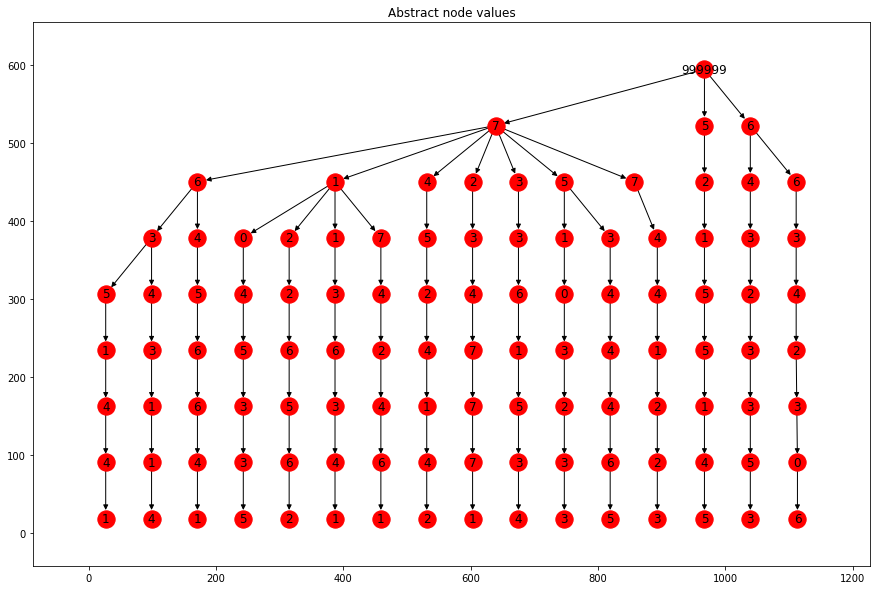

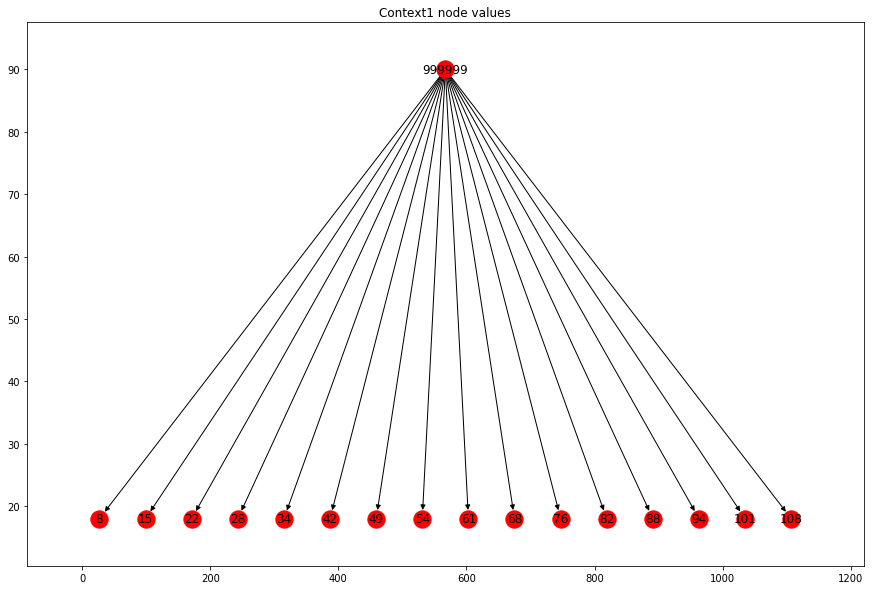

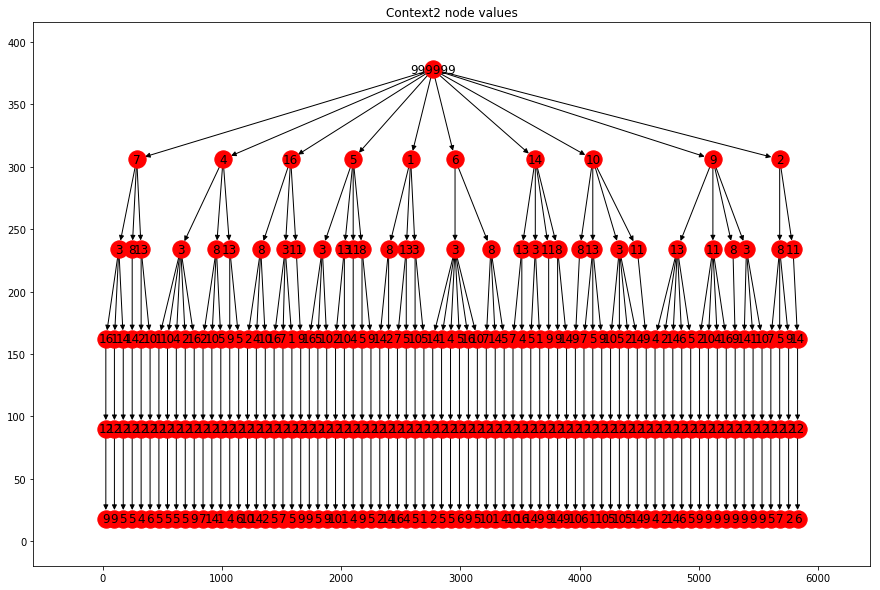

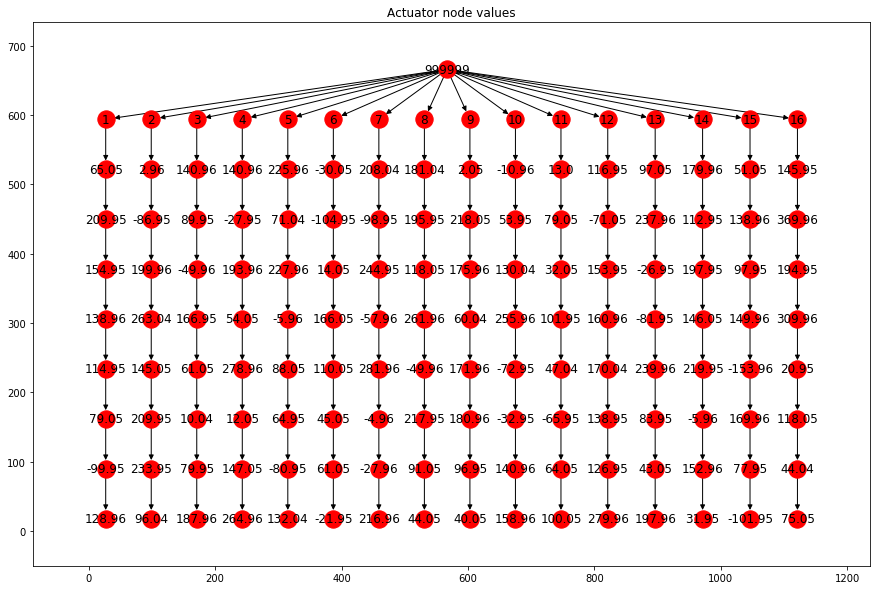

In [64]:

spek= Spektron()

for i in range(1000):
    spek.oneBeat(verbose=False)

operations= spek.getInstantOperationInput()
[print(i, operations[i]) for i in range(len(operations))]
#for count, item in enumerate(operations):
#    spek.oneBeat(symbol=item, verbose=True)
for symbol in operations:
    spek.oneComplexBeat(symbol)
for symbol in operations[:-1]:
    spek.checkOperation(symbol)
    
for i in range(100):
    operations= spek.getInstantOperationInput()
    for symbol in operations:
        spek.oneComplexBeat(symbol)
    
    
spek.displaySpektron()

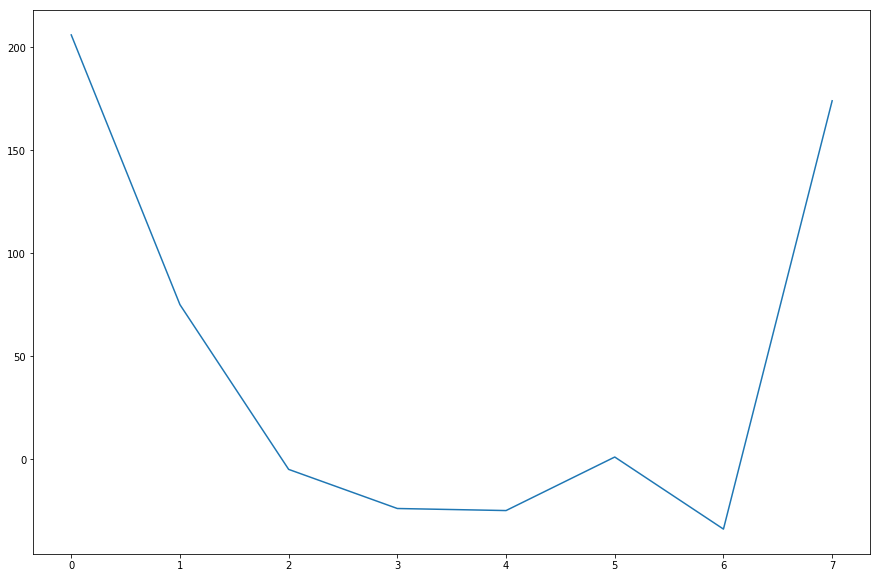

In [56]:
zero = [206, 75, -5, -24, -25, 1, -34, 174]
plt.plot(zero)

In [42]:
operations[:-1]

[[245, 143, 70, 254, 167, 52, 85, 32],
 [102, 53, 45, 61, 202, -36, 242, 73],
 [210, 92, 11, 288, -45, 150, 198, 44],
 [287, -43, 130, 57, 101, 63, 204, -49]]